In [ ]:
#conda install psycopg2

TOPICS:
1. Predict the future sales volume and price of brands in different locations(states), in order to provide stocking and pricing strategies.<br>
2. Seasonality of the store sales in different state saledate, supply chain management, in different type of product<br>
3. Return and purchase rate of different products<br>
4. Inflation trends through years in stores by different products<br>


In [1]:
import psycopg2
import pandas as pd

# Connection parameters
host = "pg.analytics.northwestern.edu"
port = "5432"
database = "everything2023"
user = ""
password = ""

# Establish a connection to the database
conn = psycopg2.connect(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)

In [2]:
cursor = conn.cursor()
sql_query = "SELECT * FROM group_13.deptinfo;"
cursor.execute(sql_query)
deptinfo = pd.read_sql_query(sql_query, conn)

cursor = conn.cursor()
sql_query2 = "SELECT * FROM group_13.trnsact TABLESAMPLE SYSTEM(10);"
cursor.execute(sql_query2)
trnsact = pd.read_sql_query(sql_query2, conn)

cursor = conn.cursor()
sql_query3 = "SELECT * FROM group_13.skstinfo;"
cursor.execute(sql_query3)
skstinfo = pd.read_sql_query(sql_query3, conn)
skstinfo.head()

cursor = conn.cursor()
sql_query4 = "SELECT * FROM group_13.strinfo;"
cursor.execute(sql_query4)
strinfo = pd.read_sql_query(sql_query4, conn)

cursor = conn.cursor()
sql_query5 = "SELECT * FROM group_13.skuinfo2;"
cursor.execute(sql_query5)
skuinfo = pd.read_sql_query(sql_query5, conn)

conn.close()

In [3]:
skstinfo

,SKU,STORE,COST,RETAIL,unknown
0,3,102,123.36,440.00,0
1,3,103,123.36,440.00,0
2,3,104,123.36,440.00,0
3,3,202,123.36,440.00,0
4,3,203,123.36,440.00,0
...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,0
39230142,9999997,2707,15.00,9.75,0
39230143,9999997,3307,15.00,19.50,0
39230144,9999997,7507,15.00,19.50,0


In [4]:
skuinfo.head()

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,0,1,2,3,4,5,6,7,8,9
1,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
2,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
3,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
4,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI


In [5]:
deptinfo.head()

,DEPT,DEPTDESC,Unknow
0,800,CLINIQUE,0
1,801,LESLIE,0
2,1100,GARY F,0
3,1107,JACQUES,0
4,1202,CABERN,0


In [6]:
trnsact

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,Unknow
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.00,79.00,360700007,696,0
1,391,203,360,6100,109800320,2004-09-03,P,1,56.0,56.00,56.00,687600007,680,0
2,391,503,250,600,0,2004-08-16,P,1,56.0,14.00,14.00,222900004,680,0
3,397,303,910,6100,544100323,2004-08-21,P,1,32.5,8.13,8.13,557900008,205,0
4,398,6902,140,3000,220804694,2005-08-27,P,1,100.0,100.00,100.00,102000018,661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097396,9999974,7002,420,3300,0,2005-07-01,P,1,82.0,59.99,59.99,567200116,290,0
12097397,9999974,7102,130,3300,0,2005-05-19,P,1,82.0,82.00,82.00,70200069,290,0
12097398,9999974,7202,210,1400,479607345,2005-08-03,P,1,82.0,41.00,41.00,853800085,290,0
12097399,9999974,7202,210,2200,479607345,2005-08-11,R,1,82.0,41.00,41.00,509100090,290,0


In [7]:
strinfo.head()

,store,city,state,zip,x
0,2,ST. PETERSBURG,FL,33710,0
1,3,ST. LOUIS,MO,63126,0
2,4,LITTLE ROCK,AR,72201,0
3,7,FORT WORTH,TX,76137,0
4,9,TEMPE,AZ,85281,0


## Clean Data

#### Drop the last column:

In [8]:
# Drop unknow column (the last column):
deptinfo.drop(columns=["Unknow"],inplace=True)
deptinfo.head()

,DEPT,DEPTDESC
0,800,CLINIQUE
1,801,LESLIE
2,1100,GARY F
3,1107,JACQUES
4,1202,CABERN


In [9]:
# Drop the last unknown column:
trnsact.drop(columns=["Unknow"],inplace=True)
trnsact

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.00,79.00,360700007,696
1,391,203,360,6100,109800320,2004-09-03,P,1,56.0,56.00,56.00,687600007,680
2,391,503,250,600,0,2004-08-16,P,1,56.0,14.00,14.00,222900004,680
3,397,303,910,6100,544100323,2004-08-21,P,1,32.5,8.13,8.13,557900008,205
4,398,6902,140,3000,220804694,2005-08-27,P,1,100.0,100.00,100.00,102000018,661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097396,9999974,7002,420,3300,0,2005-07-01,P,1,82.0,59.99,59.99,567200116,290
12097397,9999974,7102,130,3300,0,2005-05-19,P,1,82.0,82.00,82.00,70200069,290
12097398,9999974,7202,210,1400,479607345,2005-08-03,P,1,82.0,41.00,41.00,853800085,290
12097399,9999974,7202,210,2200,479607345,2005-08-11,R,1,82.0,41.00,41.00,509100090,290


In [10]:
# Drop the last unknown column:
skstinfo.drop(columns=["unknown"],inplace=True)
skstinfo

,SKU,STORE,COST,RETAIL
0,3,102,123.36,440.00
1,3,103,123.36,440.00
2,3,104,123.36,440.00
3,3,202,123.36,440.00
4,3,203,123.36,440.00
...,...,...,...,...
39230141,9999997,2007,15.00,19.50
39230142,9999997,2707,15.00,9.75
39230143,9999997,3307,15.00,19.50
39230144,9999997,7507,15.00,19.50


In [11]:
# Drop the last unknown column:
strinfo.drop(columns=['x'],inplace=True)
strinfo

,store,city,state,zip
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


In [12]:
strinfo.columns = ['STORE','CITY','STATE','ZIP']
strinfo

,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


#### Check Missing Value:

In [13]:
strinfo.isna().sum()

STORE    0
CITY     0
STATE    0
ZIP      0
dtype: int64

In [14]:
deptinfo.isna().sum()

DEPT        0
DEPTDESC    0
dtype: int64

In [15]:
trnsact.isna().sum()

SKU         0
STORE       0
REGISTER    0
TRANNUM     0
SEQ         0
SALEDATE    0
STYPE       0
QUANTITY    0
ORGPRICE    0
SPRICE      0
AMT         0
INTERID     0
MIC         0
dtype: int64

In [16]:
skstinfo.isna().sum()

SKU       0
STORE     0
COST      0
RETAIL    0
dtype: int64

In [17]:
skuinfo.isna().sum()

SKU         0
DEPT        0
CLASSID     0
UPC         0
STYLE       0
COLOR       0
SIZE        0
PACKSIZE    0
VENDOR      0
BRAND       0
dtype: int64

### strinfo:

array([[<AxesSubplot:title={'center':'STORE'}>,
        <AxesSubplot:title={'center':'ZIP'}>]], dtype=object)

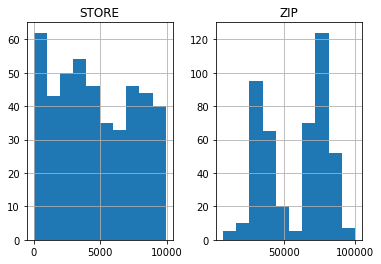

In [18]:
strinfo.hist()

Text(0.5, 1.0, 'State Distribution')

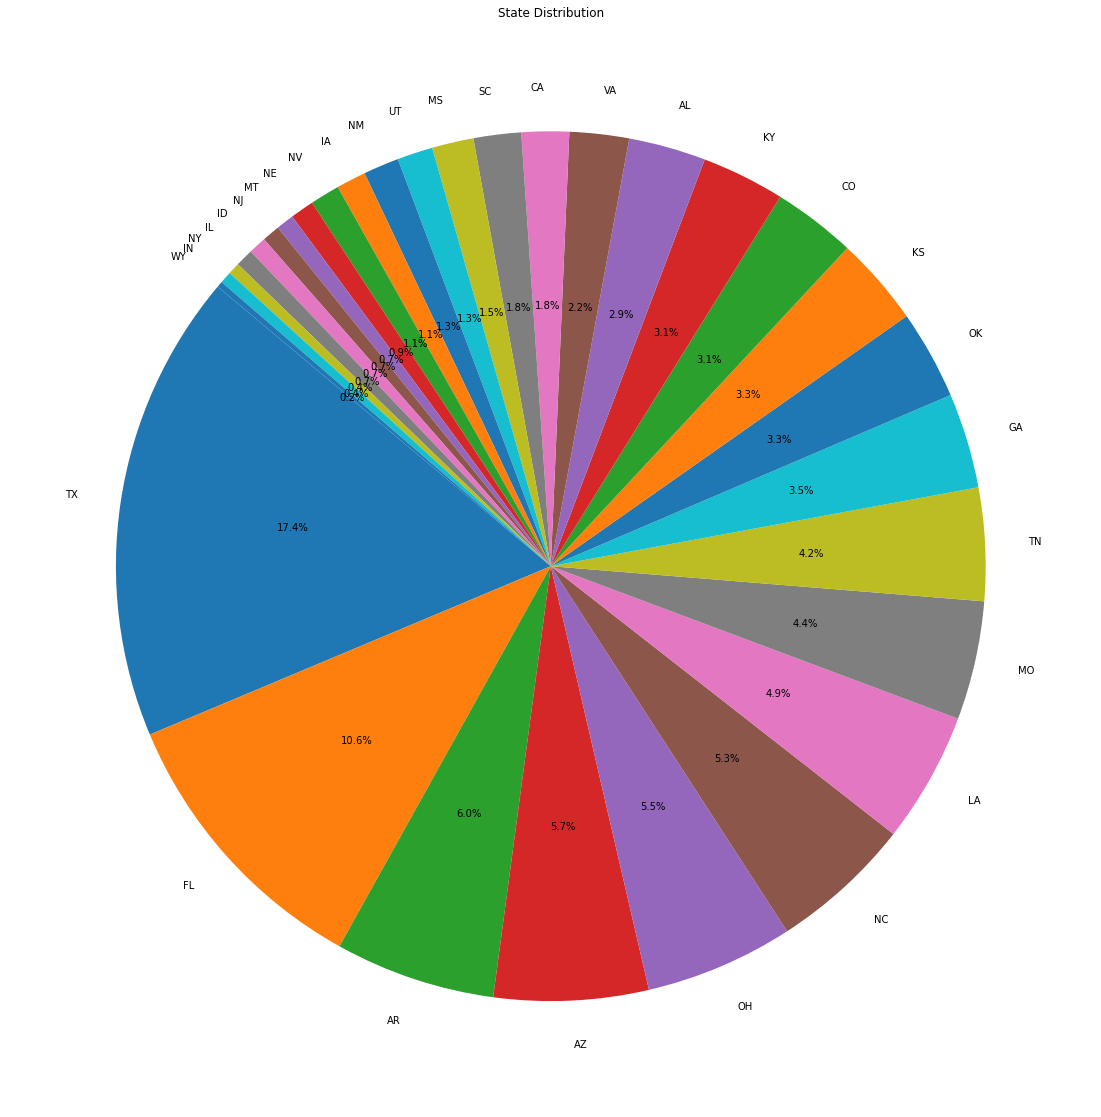

In [19]:
import matplotlib.pyplot as plt

state_counts = strinfo['STATE'].value_counts()
plt.figure(figsize=(20, 20))  # Optional: Set the figure size
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('State Distribution')

### trnsact:

In [20]:
trnsact.dtypes

SKU           int64
STORE         int64
REGISTER      int64
TRANNUM       int64
SEQ           int64
SALEDATE     object
STYPE        object
QUANTITY      int64
ORGPRICE    float64
SPRICE      float64
AMT         float64
INTERID       int64
MIC           int64
dtype: object

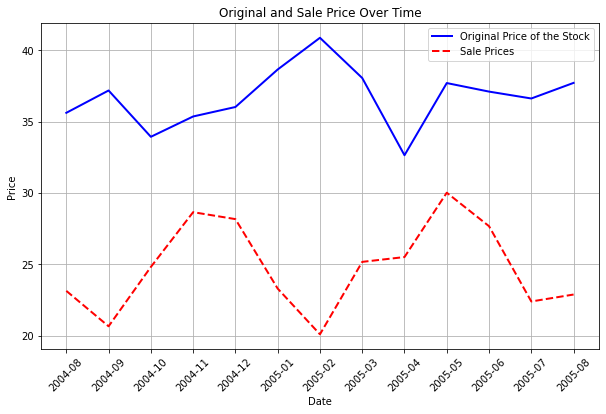

In [21]:
# Assuming 'SALEDATE' is in a datetime format
trnsact['SALEDATE'] = pd.to_datetime(trnsact['SALEDATE'])

# Extract year and month from 'SALEDATE'
trnsact['Year'] = trnsact['SALEDATE'].dt.year
trnsact['Month'] = trnsact['SALEDATE'].dt.month

# Group by year and month and calculate the mean
trnsact_group_price = trnsact.groupby(['Year', 'Month']).mean()

plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Assuming 'Year' and 'Month' are now separate columns
date_labels = [f"{year}-{month:02d}" for year, month in zip(trnsact_group_price.index.get_level_values('Year'), trnsact_group_price.index.get_level_values('Month'))]

plt.plot(date_labels, trnsact_group_price['ORGPRICE'], label='Original Price of the Stock', color='blue', linestyle='-', linewidth=2)
plt.plot(date_labels, trnsact_group_price['SPRICE'], label='Sale Prices', color='red', linestyle='--', linewidth=2)

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original and Sale Price Over Time')
plt.legend()

# Display the line chart
plt.grid(True)  # Optional: Display grid lines
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()


In [22]:
trnsact.columns

Index(['SKU', 'STORE', 'REGISTER', 'TRANNUM', 'SEQ', 'SALEDATE', 'STYPE',
       'QUANTITY', 'ORGPRICE', 'SPRICE', 'AMT', 'INTERID', 'MIC', 'Year',
       'Month'],
      dtype='object')

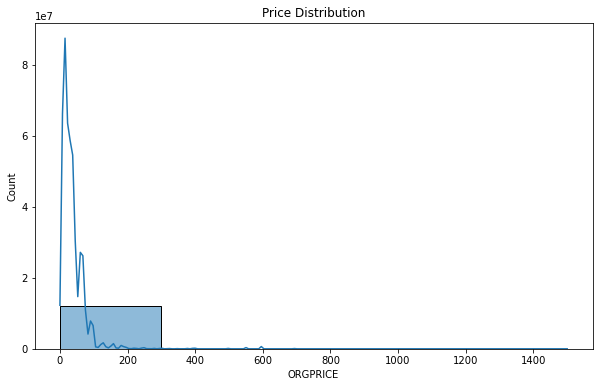

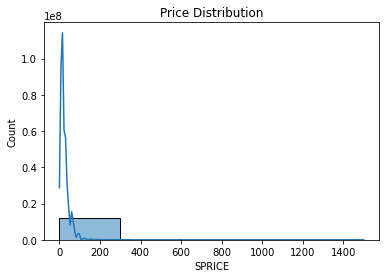

In [23]:
import seaborn as sns
# Data Distribution and Visualization
plt.figure(figsize=(10, 6))
sns.histplot(trnsact['ORGPRICE'], bins=5, kde=True)
plt.title('Price Distribution')
plt.show()
sns.histplot(trnsact['SPRICE'], bins=5, kde=True)
plt.title('Price Distribution')
plt.show()

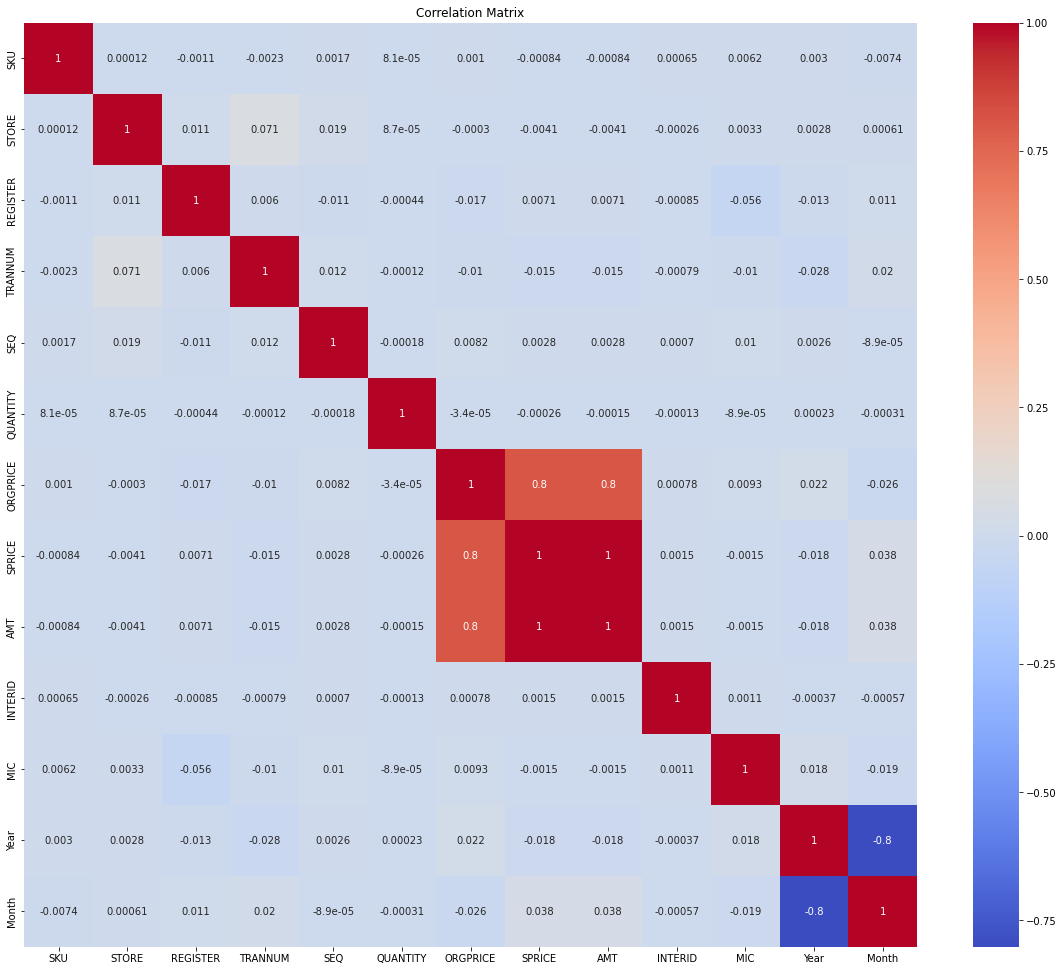

In [24]:
# Correlation Analysis
correlation_matrix = trnsact.corr()
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Merge tables

In [25]:
skuinfo['SKU'] = skuinfo['SKU'].astype(int)
skuinfo['DEPT'] = skuinfo['DEPT'].astype(int)
skuinfo['UPC'] = skuinfo['UPC'].astype(int)
skuinfo['PACKSIZE'] = skuinfo['PACKSIZE'].astype(int)
skuinfo['VENDOR'] = skuinfo['VENDOR'].astype(int)

skuinfo.dtypes

SKU          int64
DEPT         int64
CLASSID     object
UPC          int64
STYLE       object
COLOR       object
SIZE        object
PACKSIZE     int64
VENDOR       int64
BRAND       object
dtype: object

In [26]:
merge_table = pd.merge(trnsact, skuinfo, on='SKU', how='inner')
merge_table = pd.merge(merge_table, skstinfo, on=['SKU', 'STORE'], how='inner')
merge_table

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,...,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,COST,RETAIL
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.00,...,913,400000387000,74017,BROWN,110M,1,5016699,TIMBERLA,38.00,79.00
1,391,203,360,6100,109800320,2004-09-03,P,1,56.0,56.00,...,002,400000391000,30 EJMU49,N RDSE/ONX,M,1,3313116,EMMA JAM,22.14,56.00
2,398,6902,140,3000,220804694,2005-08-27,P,1,100.0,100.00,...,354,400000398000,939053,ROYAL,16,1,6913116,K STUDIO,46.75,100.00
3,418,1502,290,1400,631706034,2004-10-06,R,1,39.0,9.75,...,224,400000418000,306L44,NAVY FABRI,085M,1,10903,BROWN SH,14.00,5.99
4,418,1502,740,3200,0,2005-02-17,P,1,39.0,5.99,...,224,400000418000,306L44,NAVY FABRI,085M,1,10903,BROWN SH,14.00,5.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853729,9999974,7002,420,3300,0,2005-07-01,P,1,82.0,59.99,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,41.00
6853730,9999974,7102,130,3300,0,2005-05-19,P,1,82.0,82.00,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,41.00
6853731,9999974,7202,210,1400,479607345,2005-08-03,P,1,82.0,41.00,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,20.50
6853732,9999974,7202,210,2200,479607345,2005-08-11,R,1,82.0,41.00,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,20.50


In [27]:
merge_table = pd.merge(merge_table, deptinfo, on = 'DEPT', how='inner')
merge_table = pd.merge(merge_table, strinfo, on = 'STORE', how='inner')
merge_table

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,...,SIZE,PACKSIZE,VENDOR,BRAND,COST,RETAIL,DEPTDESC,CITY,STATE,ZIP
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.0,...,110M,1,5016699,TIMBERLA,38.0,79.00,SPERRY,MABELVALE,AR,72103
1,317373,9806,673,8800,0,2005-08-01,P,1,99.0,89.0,...,110M,1,7510902,H.H. BRO,42.5,89.00,SPERRY,MABELVALE,AR,72103
2,317373,9806,893,7100,462300308,2005-06-20,P,1,99.0,89.0,...,110M,1,7510902,H.H. BRO,42.5,89.00,SPERRY,MABELVALE,AR,72103
3,513268,9806,23,95200,504708135,2005-01-28,P,1,49.0,49.0,...,115W,1,86288,SPERRY T,28.0,39.99,SPERRY,MABELVALE,AR,72103
4,513268,9806,413,67900,0,2005-02-22,P,1,49.0,49.0,...,115W,1,86288,SPERRY T,28.0,39.99,SPERRY,MABELVALE,AR,72103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853729,5689840,1404,160,1100,0,2004-09-18,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180
6853730,5689840,1404,160,1200,646500209,2005-03-28,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180
6853731,5689840,1404,160,1300,0,2004-12-17,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180
6853732,5689840,1404,160,1400,0,2004-10-09,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180


In [28]:
# Export DataFrame to a CSV file (which can be saved with a .css extension)
merge_table.to_csv('merge_table.csv', index=False)

## Import merge_table dataset

In [1]:
import pandas as pd
merge_table = pd.read_csv("merge_table.csv")

In [2]:
# Remove all 0 or 0.01 ORGPRICE and 0 SPRICE:
merge_table = merge_table[merge_table['ORGPRICE'] > 0]
merge_table = merge_table[merge_table['ORGPRICE'] > 0.01]
merge_table = merge_table[merge_table['SPRICE'] > 0]

### Group by STATE, STORE, BRAND, and Year

In [3]:
merge_table['PROFIT'] = merge_table['SPRICE'] - merge_table['COST']
merge_table['discount_rate'] =(merge_table['ORGPRICE'] - merge_table['SPRICE'])/(merge_table['ORGPRICE'])

# Group the data by 'STATE', 'STORE', 'BRAND', and 'Year':
grouped_data = merge_table.groupby(['STATE', 'STORE', 'BRAND', 'Year']).agg({
    'SPRICE': 'sum',
    'PROFIT': 'sum',
    'QUANTITY': 'sum',
    'ORGPRICE': 'sum',
    'COST': 'sum',
    'RETAIL': 'sum',
    'discount_rate': 'mean' 
}).reset_index()

# Display the resulting DataFrame
grouped_data


,STATE,STORE,BRAND,Year,SPRICE,PROFIT,QUANTITY,ORGPRICE,COST,RETAIL,discount_rate
0,AL,3902,,2004,3.60,-0.24,1,9.0,3.84,5.00,0.600000
1,AL,3902,,2005,204.73,107.43,3,244.0,97.30,120.99,0.110000
2,AL,3902,A H SCHR,2005,2077.84,1039.65,38,3034.0,1038.19,1517.00,0.320336
3,AL,3902,A.C.T. I,2004,3.60,1.84,1,6.0,1.76,1.50,0.400000
4,AL,3902,ADIDAS A,2005,116.50,30.10,12,216.0,86.40,54.00,0.479167
...,...,...,...,...,...,...,...,...,...,...,...
167560,WY,9909,WRAPPER/,2005,1265.56,259.31,83,2647.0,1006.25,1020.25,0.530727
167561,WY,9909,YMI JEAN,2004,162.99,97.24,5,176.0,65.75,86.98,0.068474
167562,WY,9909,YMI JEAN,2005,653.56,219.19,31,1083.0,434.37,534.18,0.395605
167563,WY,9909,Z-CAVARI,2004,110.97,41.52,4,162.0,69.45,67.50,0.303750


In [4]:
# Create a new column named High_Profit. Store value as 1 is the profit greater than 100, otherwise, 0.
grouped_data['High_Profit'] = grouped_data['PROFIT'].apply(lambda x: 1 if x > 100 else 0)

### EDA

In [5]:
# Summary Statistics
summary_stats = grouped_data.describe()
summary_stats

,STORE,Year,SPRICE,PROFIT,QUANTITY,ORGPRICE,COST,RETAIL,discount_rate,High_Profit
count,167565.000000,167565.000000,167565.000000,167565.000000,167565.000000,167565.000000,167565.000000,167565.000000,167565.000000,167565.000000
mean,4523.428329,2004.626294,1014.633669,398.155774,40.257876,1404.504823,616.477895,854.461874,0.233518,0.472646
std,2803.443004,0.483788,3201.900019,1209.259106,138.986465,4198.607926,2066.485229,2940.501768,0.224841,0.499253
min,102.000000,2004.000000,0.010000,-3893.990000,1.000000,2.000000,0.000000,0.000000,-3.000000,0.000000
25%,2204.000000,2004.000000,68.780000,23.000000,3.000000,92.000000,38.000000,48.500000,0.000000,0.000000
50%,4207.000000,2005.000000,220.520000,87.890000,10.000000,300.000000,124.000000,166.930000,0.189029,0.000000
75%,7007.000000,2005.000000,743.680000,309.290000,29.000000,1041.000000,426.630000,590.000000,0.388013,1.000000
max,9909.000000,2005.000000,106225.720000,39379.560000,5218.000000,150619.500000,71868.820000,98076.500000,0.999474,1.000000


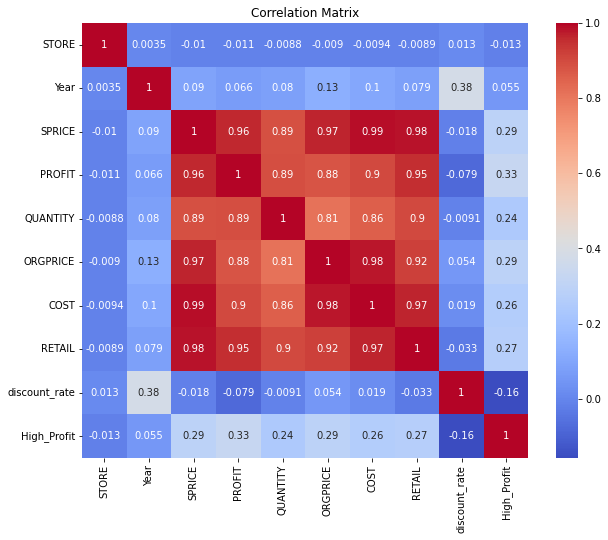

In [6]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation Analysis
correlation_matrix = grouped_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

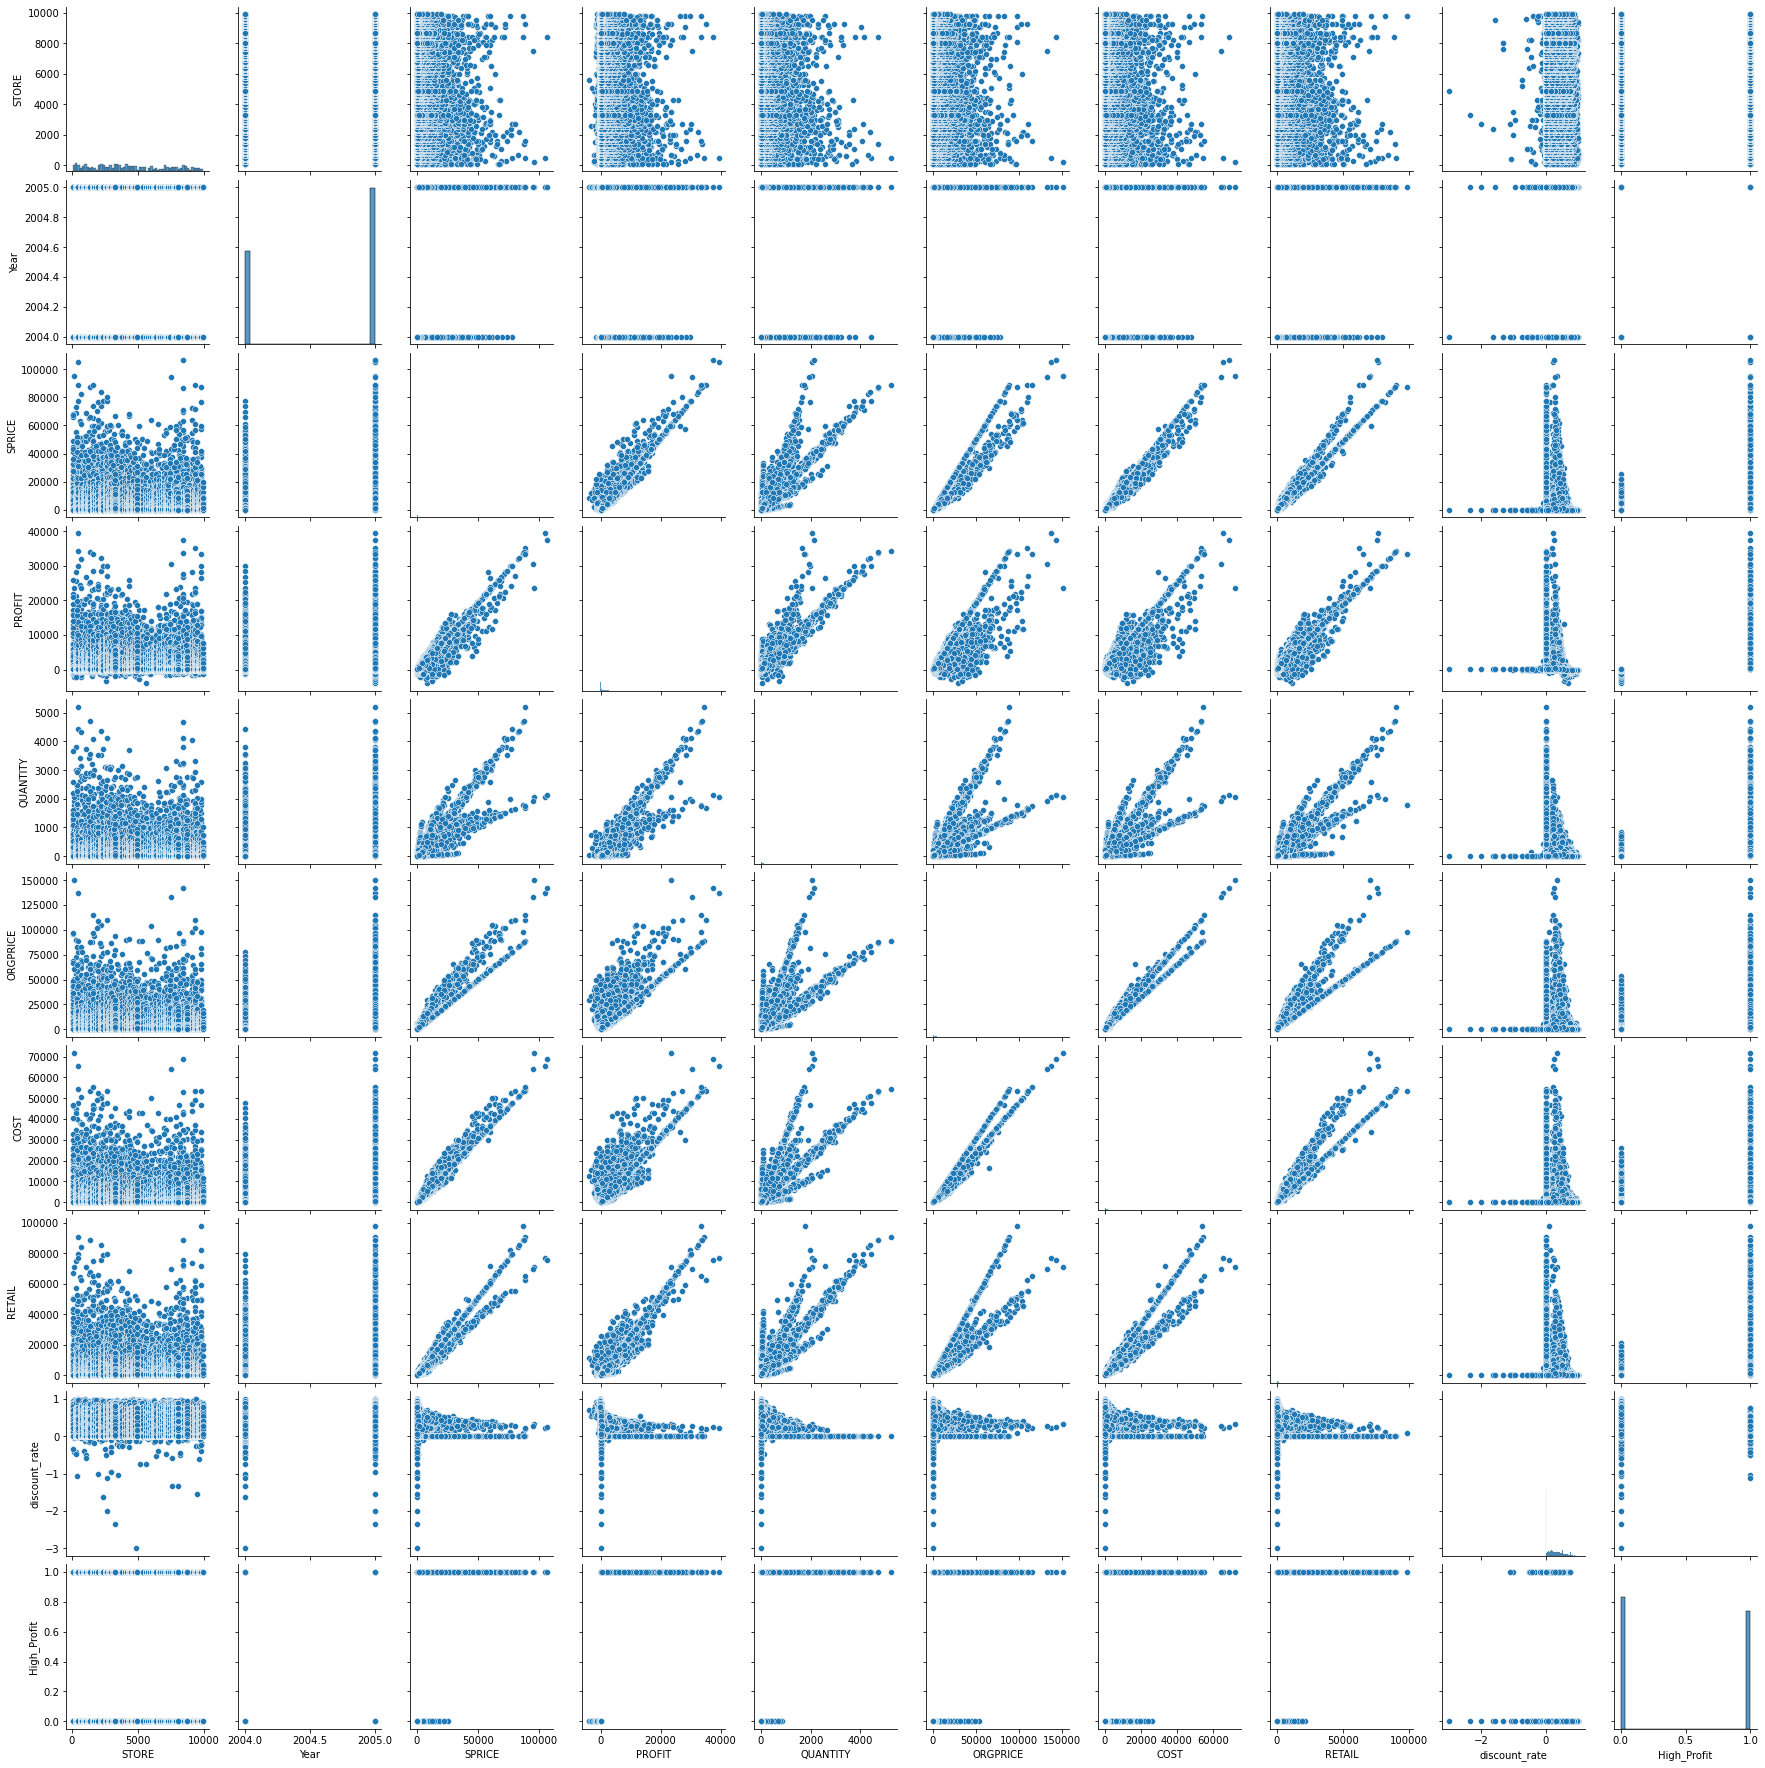

In [7]:
# Scatter Plot Matrix
import seaborn as sns

numerical_columns = grouped_data.columns
sns.pairplot(grouped_data[numerical_columns])
plt.show()


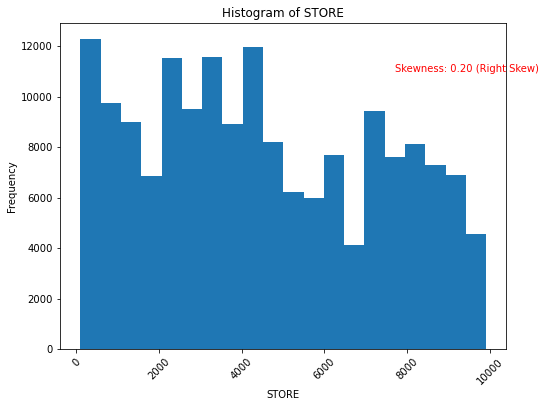

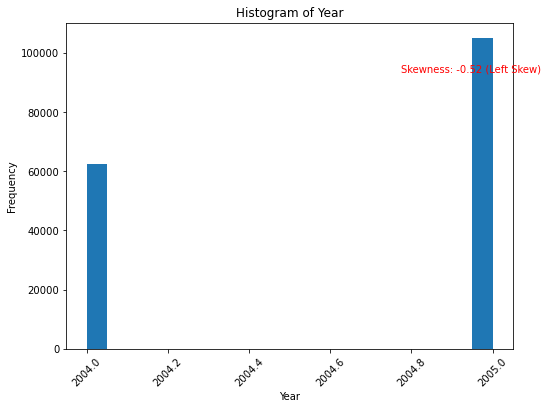

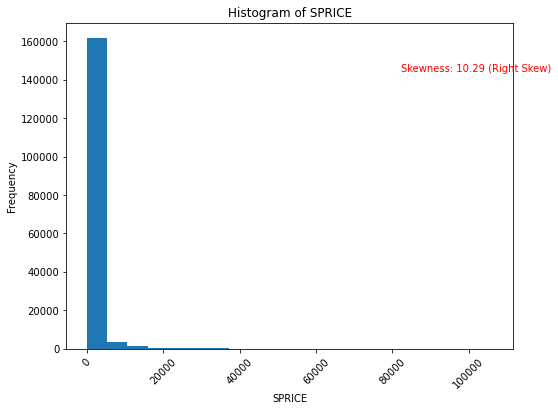

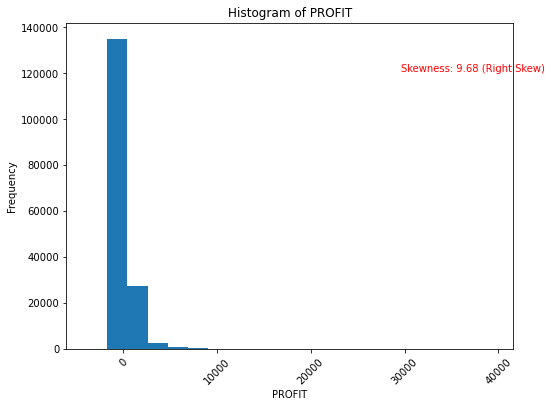

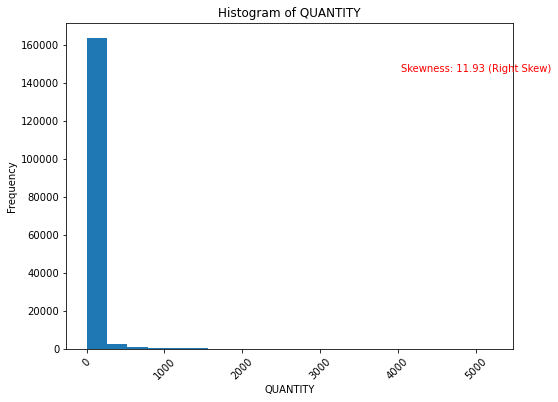

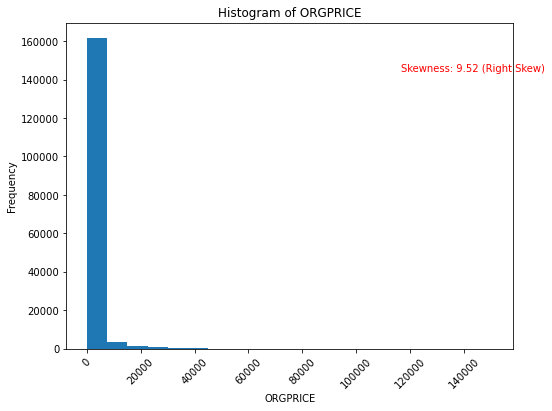

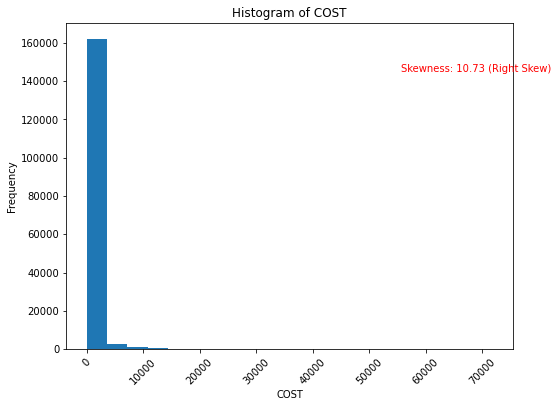

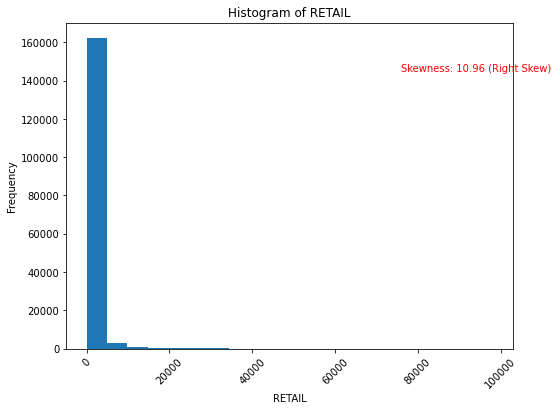

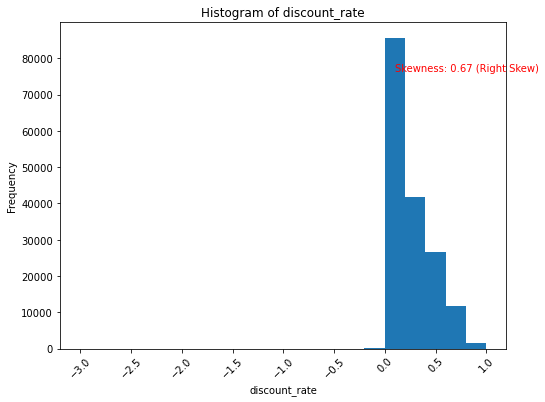

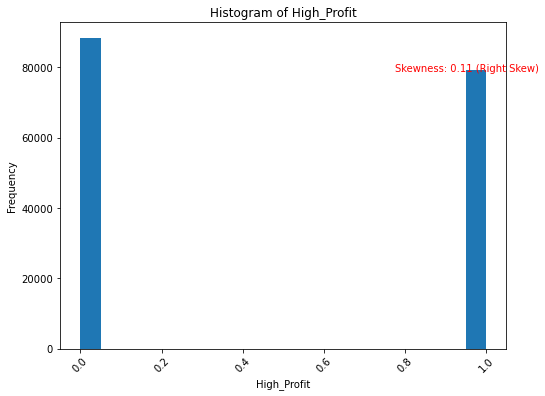

In [13]:
# Histograms
from scipy.stats import skew

numeric_columns = grouped_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(grouped_data[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)

    # Calculate skewness
    skewness = skew(grouped_data[column])
    if skewness > 0:
        skewness_label = 'Right Skew'
    elif skewness < 0:
        skewness_label = 'Left Skew'
    else:
        skewness_label = 'No Skew'
        
    # Add skewness label to the plot
    plt.text(0.75, 0.85, f'Skewness: {skewness:.2f} ({skewness_label})', 
             transform=plt.gca().transAxes, fontsize=10, color='red')
    
    plt.show()


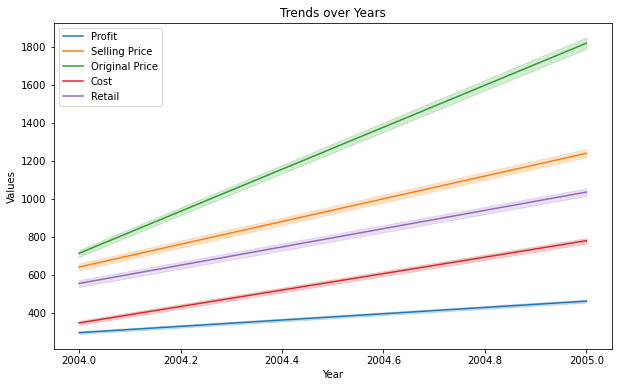

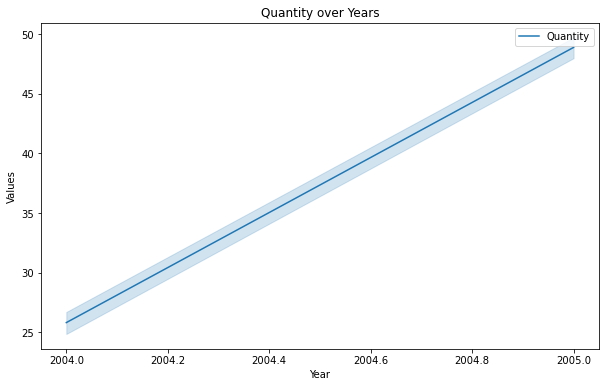

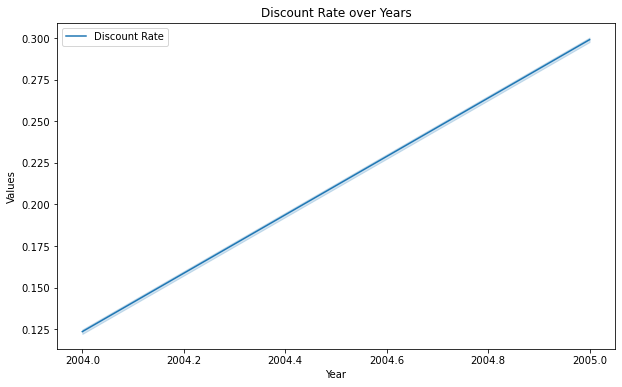

In [16]:
# Time series plot over 'Year'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='PROFIT', data=grouped_data, label='Profit')
sns.lineplot(x='Year', y='SPRICE', data=grouped_data, label='Selling Price')
sns.lineplot(x='Year', y='ORGPRICE', data=grouped_data, label='Original Price')
sns.lineplot(x='Year', y='COST', data=grouped_data, label='Cost')
sns.lineplot(x='Year', y='RETAIL', data=grouped_data, label='Retail')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trends over Years')
plt.legend()
plt.show()

# Time series plot over 'Year' for Quantity
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='QUANTITY', data=grouped_data, label='Quantity')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Quantity over Years')
plt.legend()
plt.show()

# Time series plot over 'Year' for discount_rate variables:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='discount_rate', data=grouped_data, label='Discount Rate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Discount Rate over Years')
plt.legend()
plt.show()

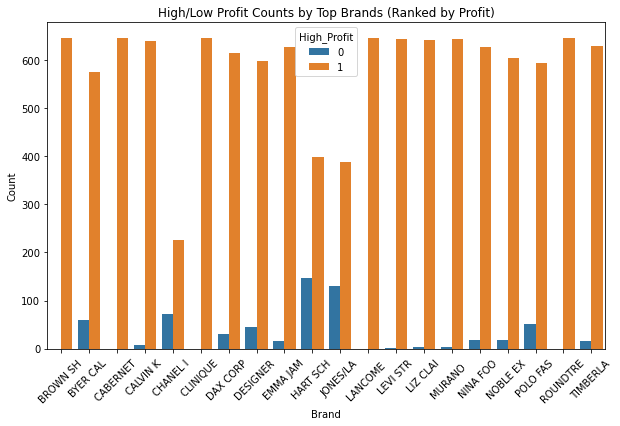

In [11]:
# High/Low Profit Counts by Top Brands (Ranked by Profit)

# Calculate total profit for each brand
brand_profit = grouped_data.groupby('BRAND')['PROFIT'].sum()

# Select the top 20 brands based on profit
top_brands_profit = brand_profit.nlargest(20)  

# Filter the data for the top brands by profit
top_brand_data_profit = grouped_data[grouped_data['BRAND'].isin(top_brands_profit.index)]

# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='BRAND', hue='High_Profit', data=top_brand_data_profit)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('High/Low Profit Counts by Top Brands (Ranked by Profit)')
plt.xticks(rotation=45)
plt.show()


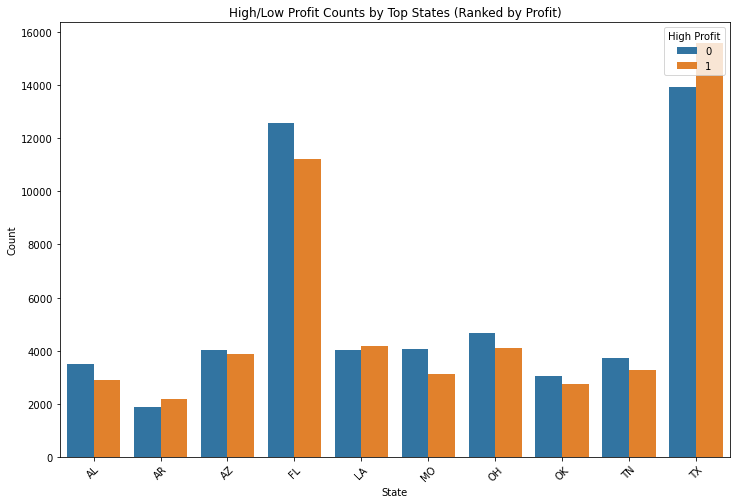

In [12]:
# High/Low Profit Counts by Top States (Ranked by Profit)
state_profit = grouped_data.groupby('STATE')['PROFIT'].sum()

# Select the top 10 states based on profit
top_states_profit = state_profit.nlargest(10)  

# Filter the data for the top states by profit
top_state_data_profit = grouped_data[grouped_data['STATE'].isin(top_states_profit.index)]

# Countplot of 'STATE' by 'High_Profit' for top states by profit
plt.figure(figsize=(12, 8))
sns.countplot(x='STATE', hue='High_Profit', data=top_state_data_profit)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('High/Low Profit Counts by Top States (Ranked by Profit)')
plt.xticks(rotation=45)
plt.legend(title='High Profit', loc='upper right')
plt.show()


## Models

In [63]:
# Drop PROFIT variable
grouped_data = grouped_data.drop(columns=['PROFIT'])

# Factorize STATE and BRAND variables
columns_to_factorize = ['STATE', 'BRAND']
for column in columns_to_factorize:
    grouped_data[f'{column}_factorized'], _ = pd.factorize(grouped_data[column])
final_data = grouped_data.drop(columns=['STATE','BRAND'])

In [64]:
grouped_data

,STATE,STORE,BRAND,Year,SPRICE,QUANTITY,ORGPRICE,COST,RETAIL,discount_rate,High_Profit,STATE_factorized,BRAND_factorized
0,AL,3902,,2004,3.60,1,9.0,3.84,5.00,0.600000,0,0,0
1,AL,3902,,2005,204.73,3,244.0,97.30,120.99,0.110000,1,0,0
2,AL,3902,A H SCHR,2005,2077.84,38,3034.0,1038.19,1517.00,0.320336,1,0,1
3,AL,3902,A.C.T. I,2004,3.60,1,6.0,1.76,1.50,0.400000,0,0,2
4,AL,3902,ADIDAS A,2005,116.50,12,216.0,86.40,54.00,0.479167,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167560,WY,9909,WRAPPER/,2005,1265.56,83,2647.0,1006.25,1020.25,0.530727,1,28,308
167561,WY,9909,YMI JEAN,2004,162.99,5,176.0,65.75,86.98,0.068474,0,28,310
167562,WY,9909,YMI JEAN,2005,653.56,31,1083.0,434.37,534.18,0.395605,1,28,310
167563,WY,9909,Z-CAVARI,2004,110.97,4,162.0,69.45,67.50,0.303750,0,28,311


### Logistic Regression

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model AUC on Training Data = 0.9835865548853172


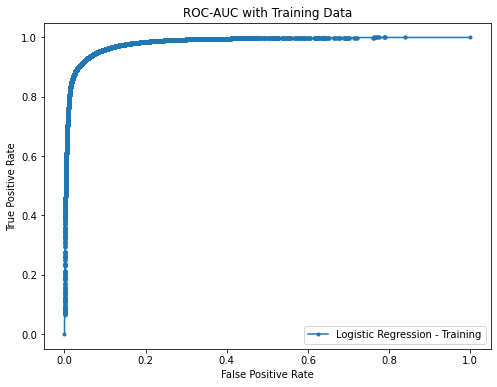

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     17730
           1       0.98      0.84      0.90     15783

    accuracy                           0.91     33513
   macro avg       0.92      0.91      0.91     33513
weighted avg       0.92      0.91      0.91     33513



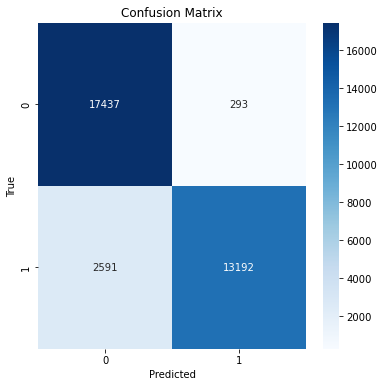

In [67]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

# Separate features and target variable
x = final_data.drop(columns=['High_Profit'])  # Features
y = final_data['High_Profit']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)

# Initialize Logistic Regression with specific parameters
model = LogisticRegression(penalty='l1', C=5, solver='liblinear', random_state=400)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get predicted probabilities for training data
y_prob_train = model.predict_proba(X_train)[:, 1]

# Calculate ROC AUC score for training data
model_auc_train = roc_auc_score(y_train, y_prob_train)
print(f'Model AUC on Training Data = {model_auc_train}')

# Generate ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)

# Plot ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, marker='.', label='Logistic Regression - Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with Training Data')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)

# Calculate classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Random Forest Classifier

Model AUC on Training Data = 1.0


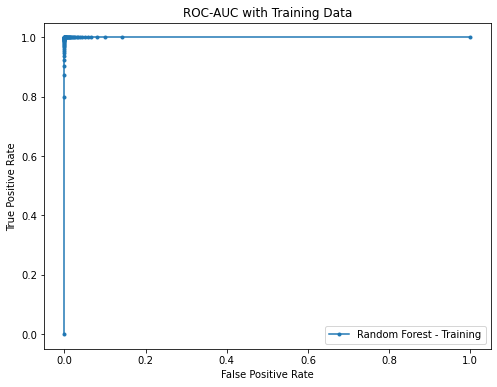

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17730
           1       0.99      0.99      0.99     15783

    accuracy                           0.99     33513
   macro avg       0.99      0.99      0.99     33513
weighted avg       0.99      0.99      0.99     33513



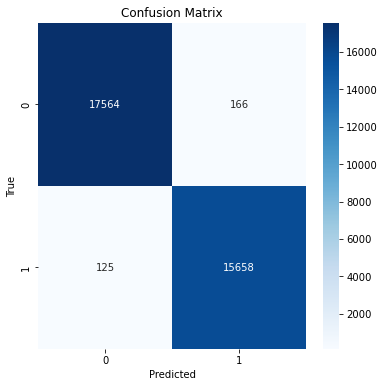

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=400)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get predicted probabilities for training data
y_prob_train = model.predict_proba(X_train)[:, 1]

# Calculate ROC AUC score for training data
model_auc_train = roc_auc_score(y_train, y_prob_train)
print(f'Model AUC on Training Data = {model_auc_train}')

# Generate ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)

# Plot ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, marker='.', label='Random Forest - Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC with Training Data')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)

# Calculate classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Gradient Boosting Classifier

ROC AUC Score: 0.9987968020451087


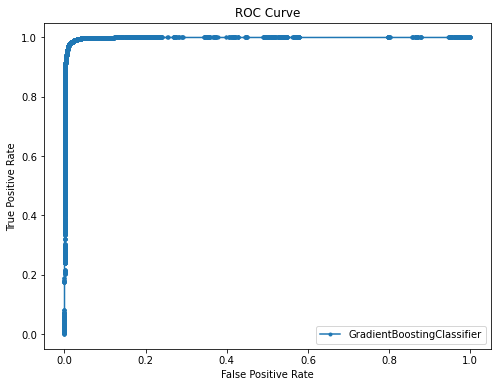


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     17730
           1       0.98      0.99      0.98     15783

    accuracy                           0.98     33513
   macro avg       0.98      0.98      0.98     33513
weighted avg       0.98      0.98      0.98     33513



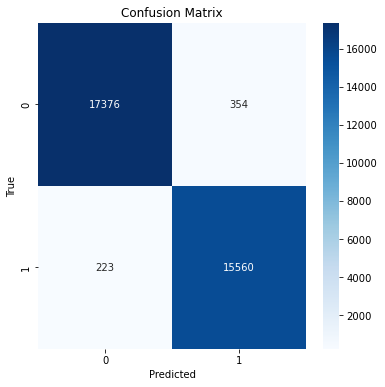

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=400)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities for test data
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc}')

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
